In [27]:
# Data manipulation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import data

In [28]:
import glob
# Get a list of all CSV file paths in the "Data" folder
csv_files = glob.glob('Data/BRA_ABR_2019_02/*.csv')

# Open each CSV file and store the data in a list
df_list = []
for file in csv_files:
    df = pd.read_csv(file)
    df_list.append(df)

In [29]:
# print(df_list[0]["dist_to_nest"][df_list[0]["dist_to_nest"] < 0.001])
# for i in range(5) :
#     plt.plot(df_list[i]["dist_to_nest"])
#     plt.show()

# Segment per day

In [30]:
for i_doc in range(4) : 
    df = df_list[i_doc]
    df['date'] = pd.to_datetime(df['date'])
    grouped = df.groupby('date')

    for date, group_data in grouped:
        df_date = pd.DataFrame(group_data)
        
        filename = f"Data_segmented/by_day/data_segmented_"+str(i_doc+1)+"_{}.csv".format(date.strftime('%Y-%m-%d'))
        df_date.to_csv(filename, index=False)

In [31]:
csv_files_seg = glob.glob('Data_segmented/by_day/*.csv')

# Open each CSV file and store the data in a list
df_list_seg = []
for file in csv_files_seg:
    df = pd.read_csv(file)
    df_list_seg.append(df)

# New Dist_to_nest

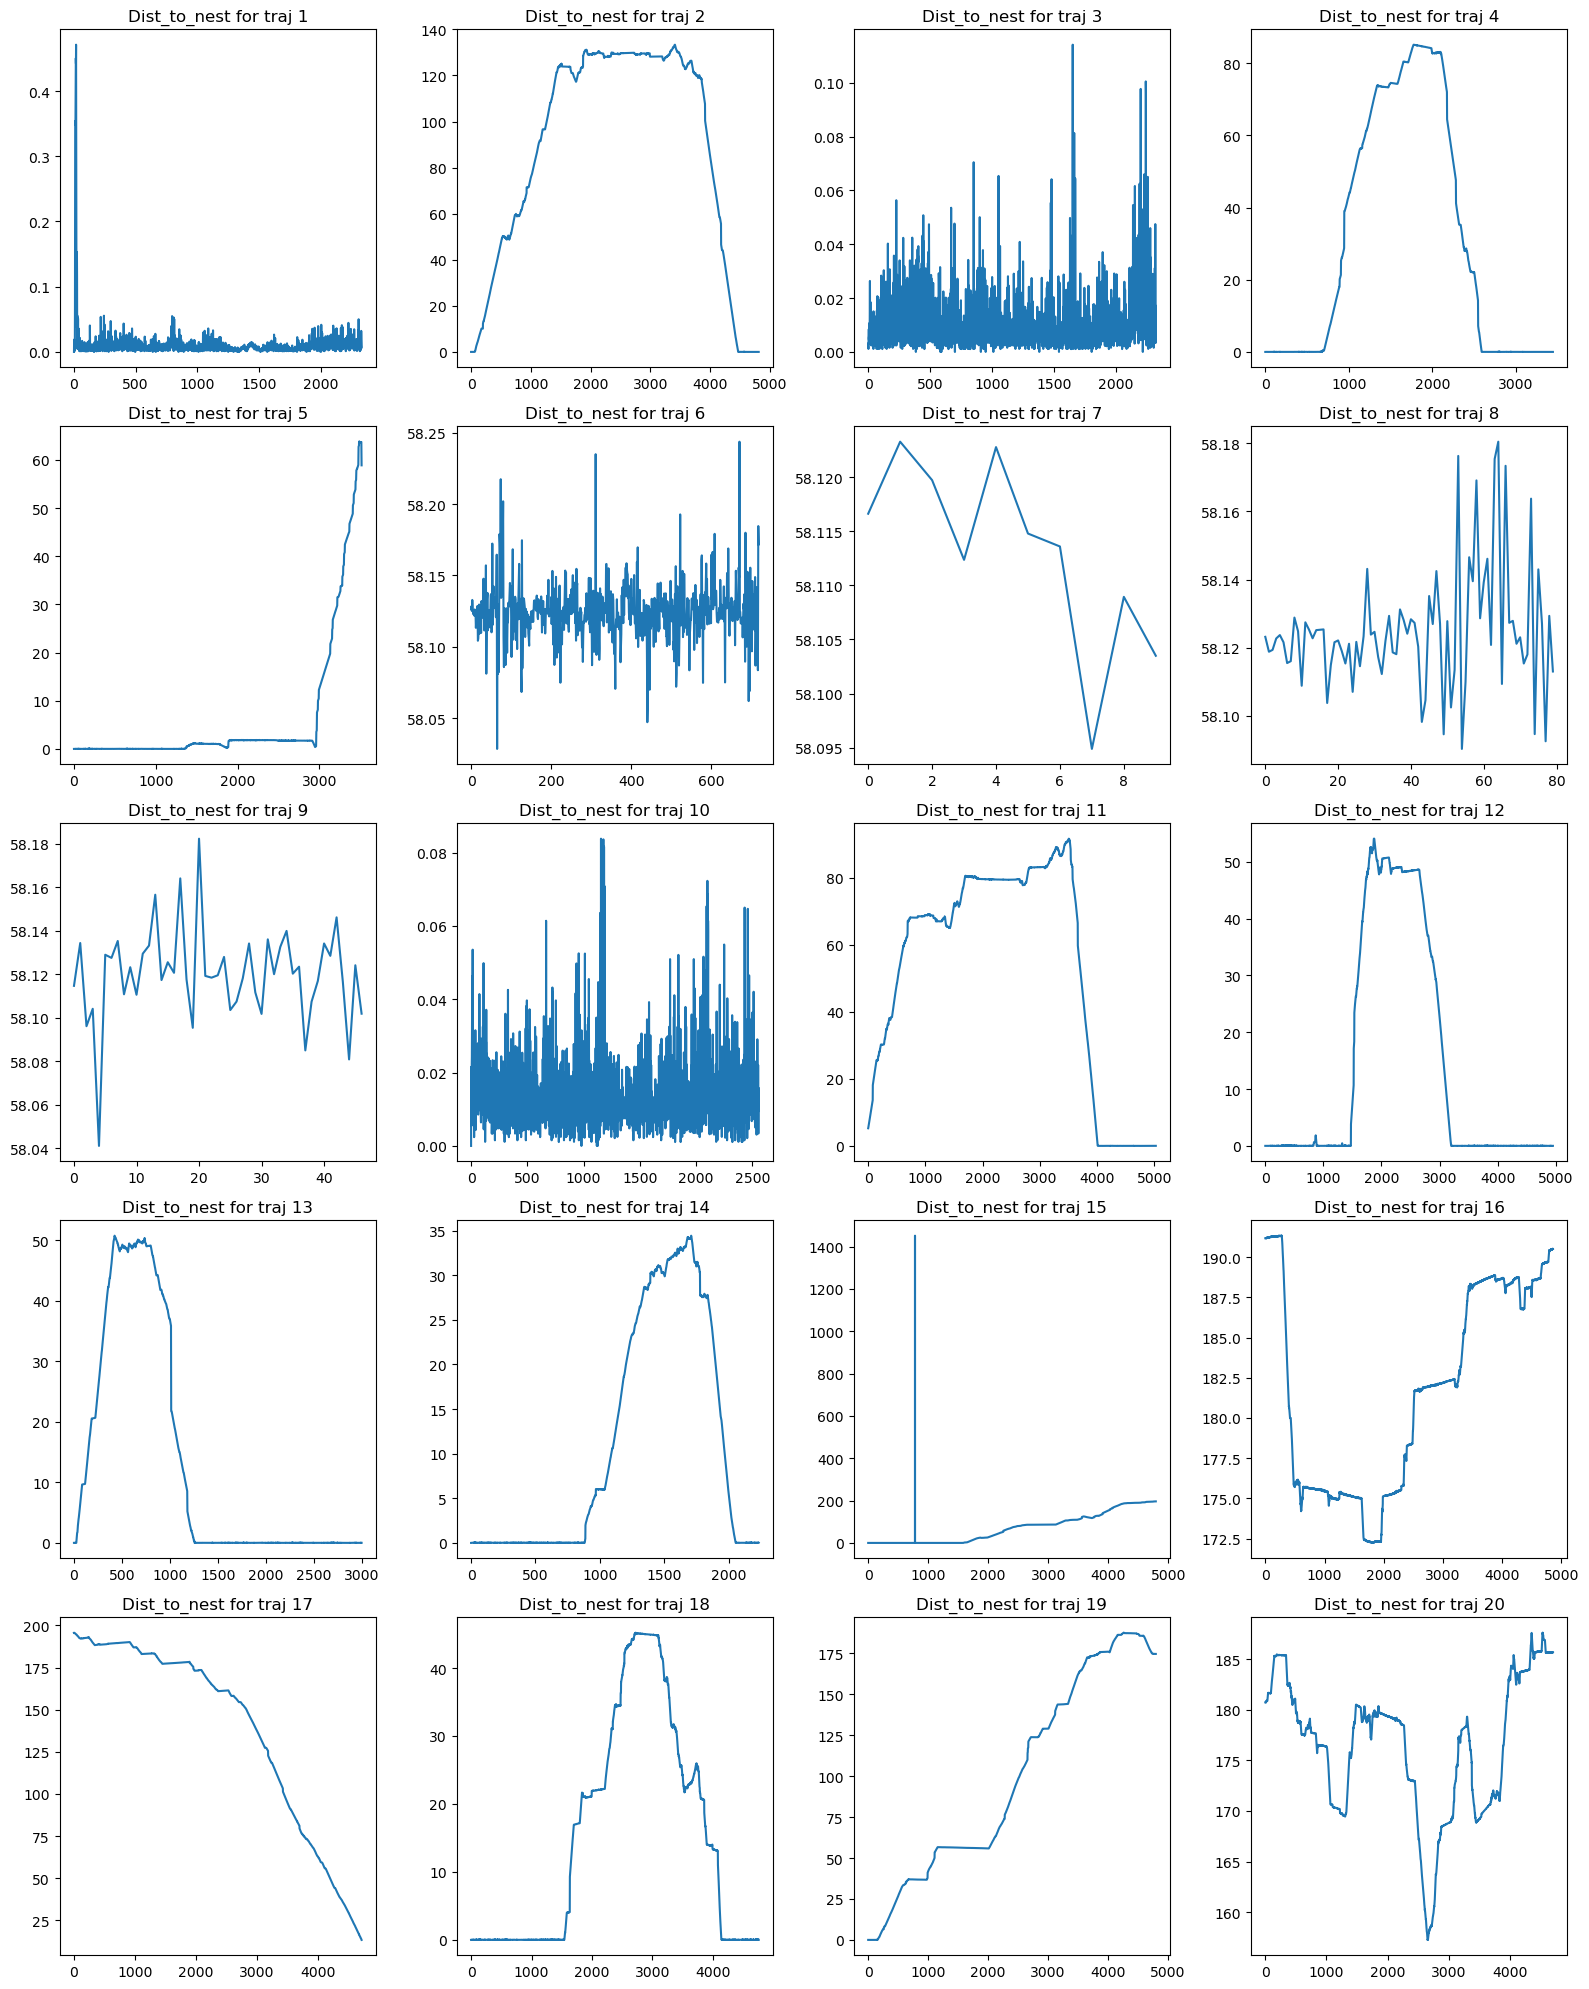

In [32]:
nb = len(df_list_seg)

num_rows = int(nb/4)  # Number of rows (integer division rounding up)
num_cols = 4

# Calculate the size of each subplot
subplot_size = 4 
fig_width = subplot_size * num_cols  
fig_height = subplot_size * num_rows 

# Create a figure with subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))

# fig, axs = plt.subplots(int(nb/4), 4, figsize=(nb, nb))
axs = axs.flatten()

for i, ax in enumerate(axs):
    # on peut calculer la durée de sortie aussi
    ax.plot(df_list_seg[i]["dist_to_nest"])
    ax.set_title(f'Dist_to_nest for traj {i+1}')

plt.tight_layout()
plt.show()

# New Lon-Lat data

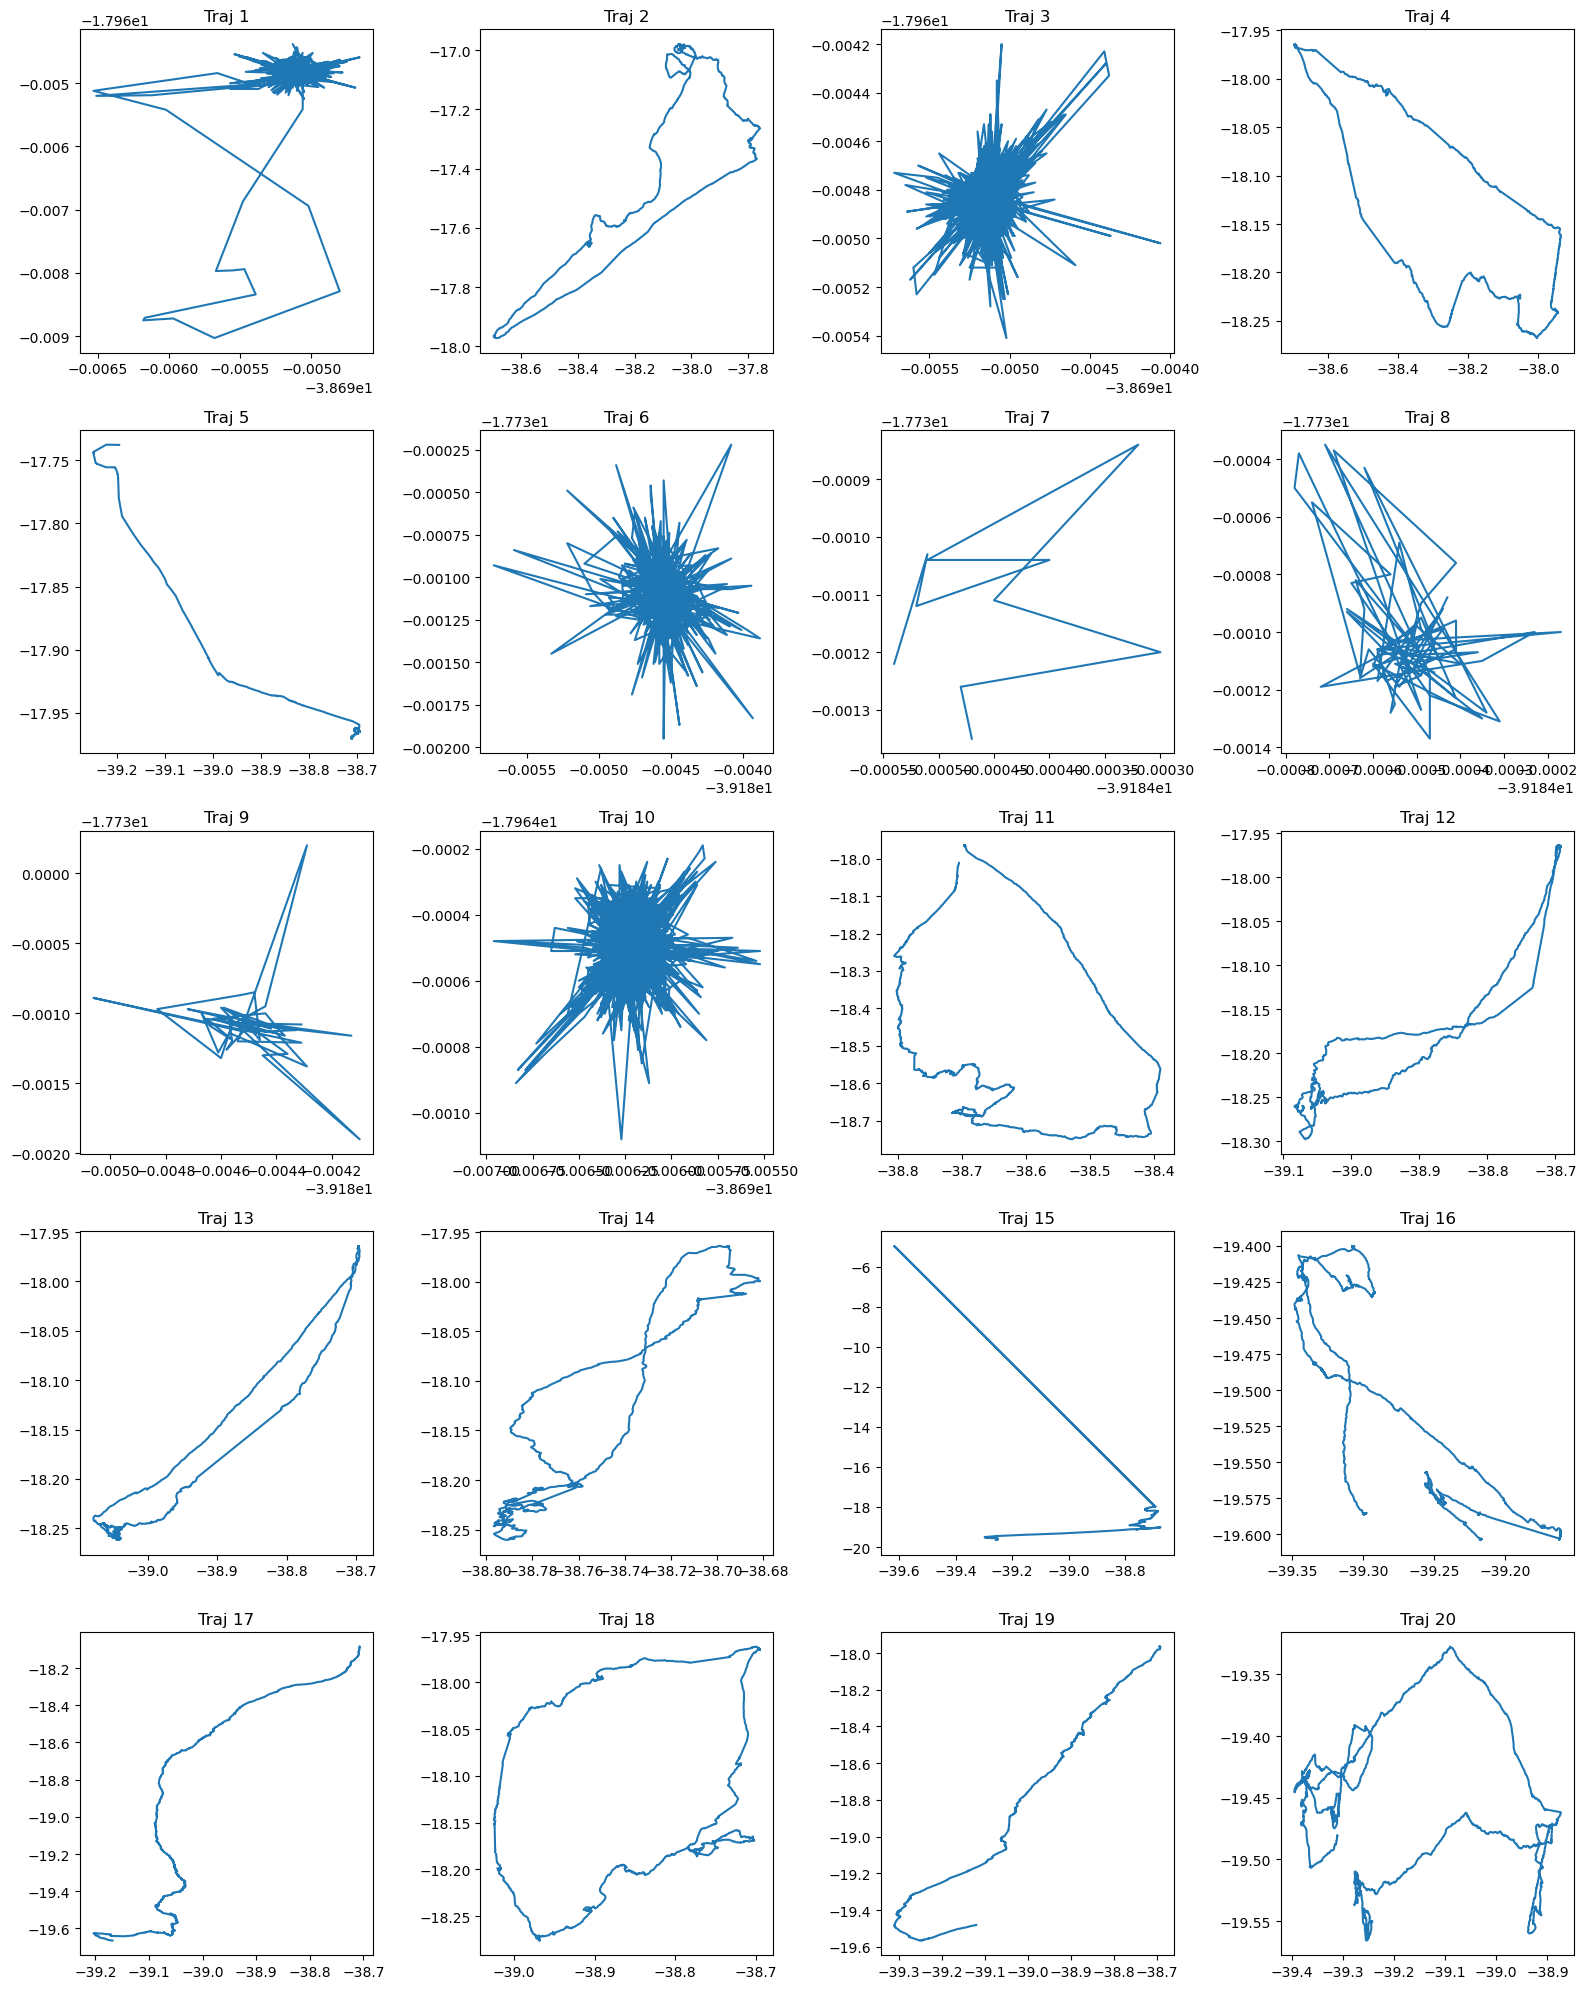

In [33]:
nb = len(df_list_seg)

num_rows = int(nb/4)  # Number of rows (integer division rounding up)
num_cols = 4

# Calculate the size of each subplot
subplot_size = 4 
fig_width = subplot_size * num_cols  
fig_height = subplot_size * num_rows 

# Create a figure with subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))

# fig, axs = plt.subplots(int(nb/4), 4, figsize=(nb, nb))
axs = axs.flatten()

for i, ax in enumerate(axs):
    ax.plot(df_list_seg[i]['lon'], df_list_seg[i]['lat'])
    ax.set_title(f'Traj {i+1}')

plt.tight_layout()
plt.show()
